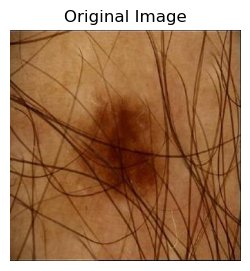

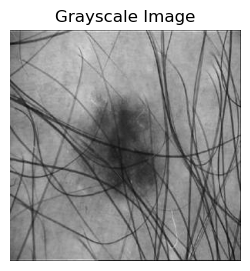

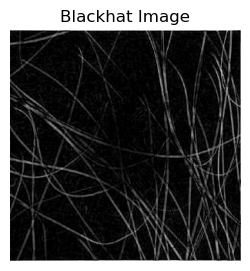

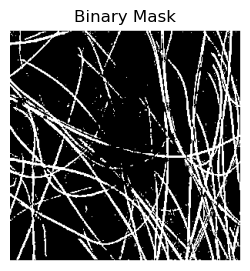

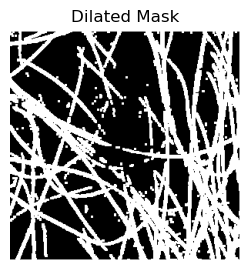

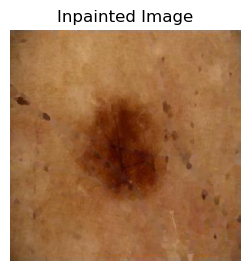

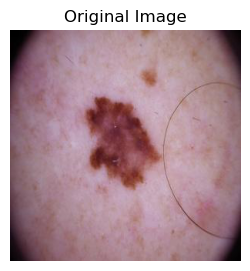

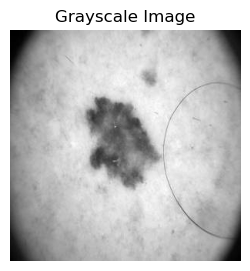

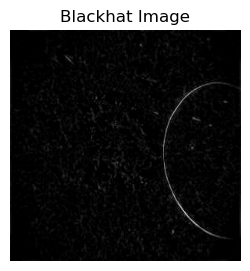

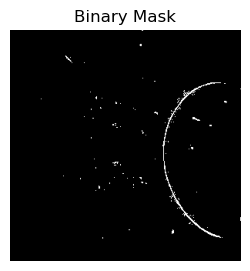

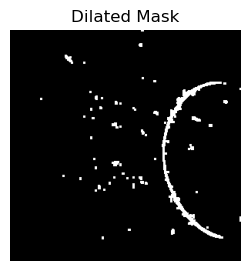

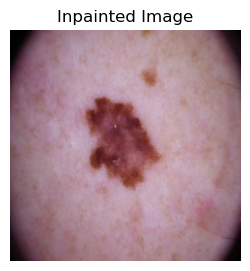

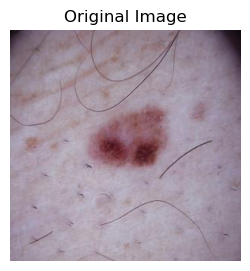

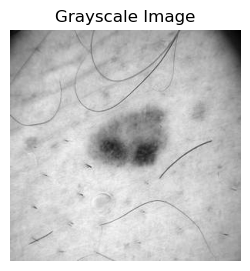

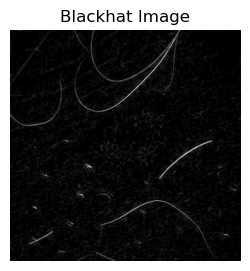

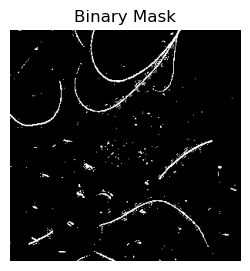

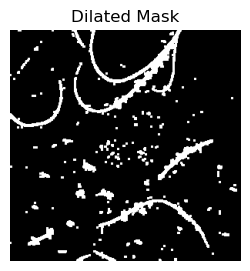

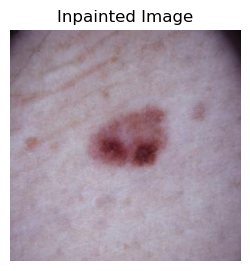

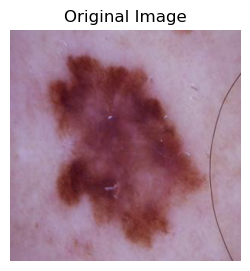

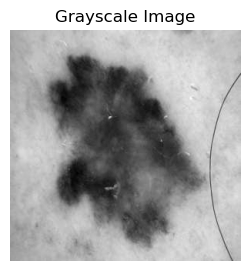

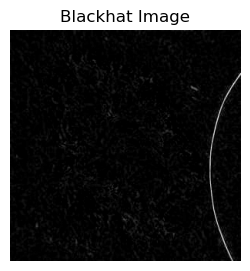

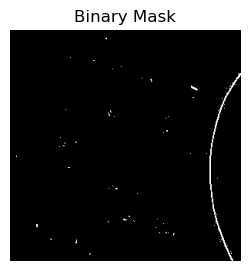

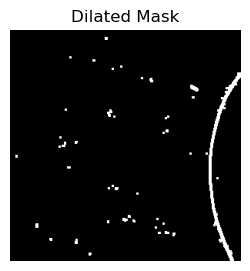

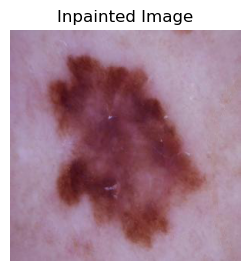

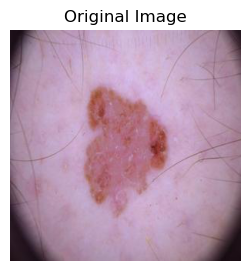

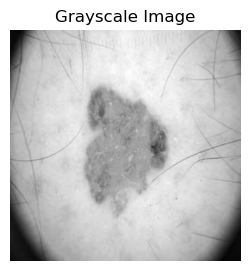

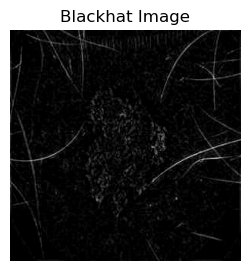

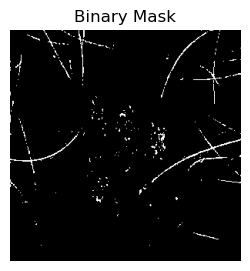

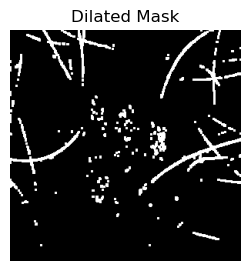

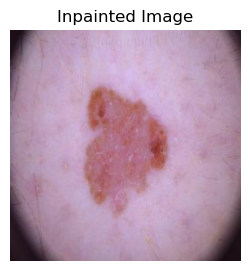

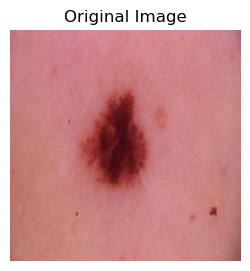

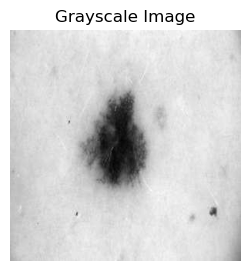

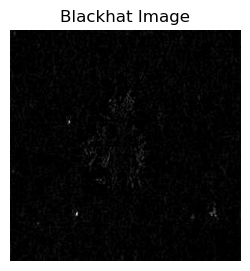

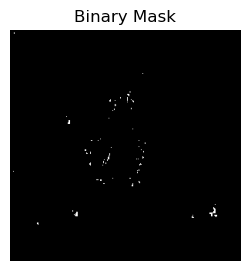

No significant hair detected, saving original image.


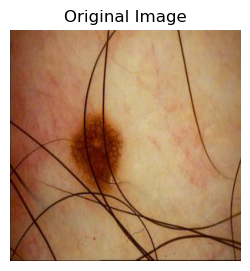

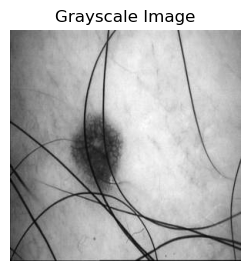

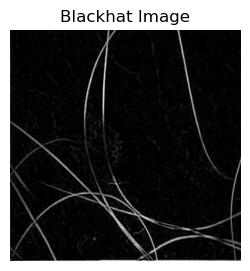

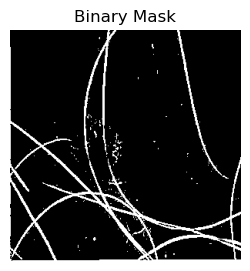

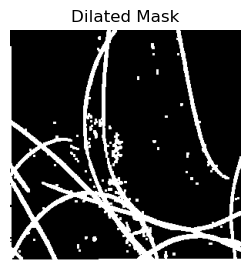

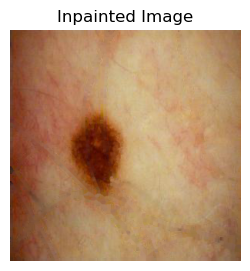

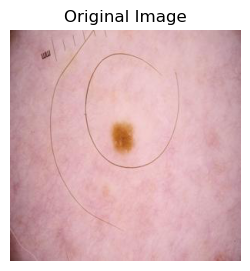

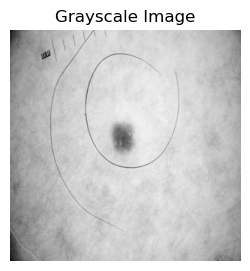

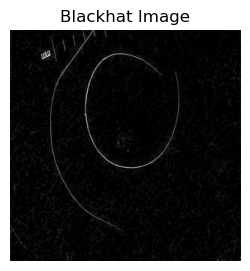

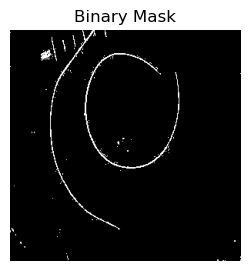

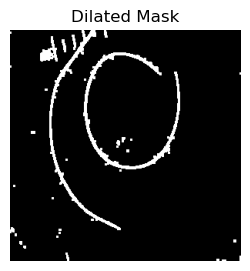

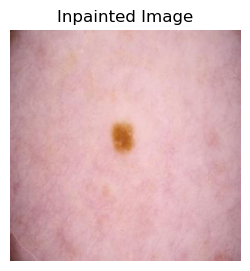

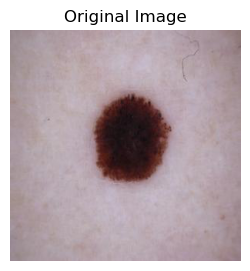

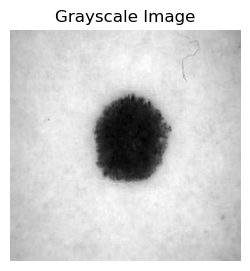

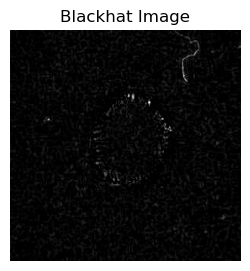

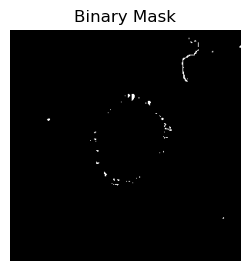

No significant hair detected, saving original image.


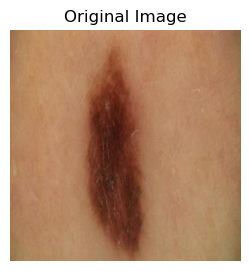

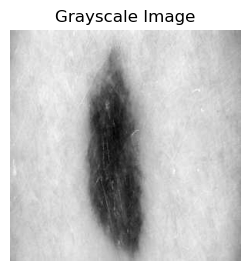

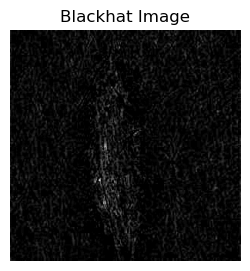

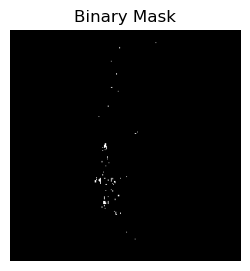

No significant hair detected, saving original image.


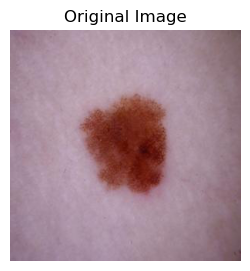

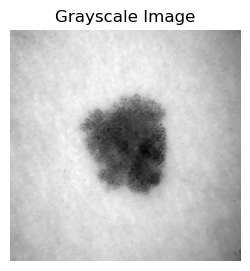

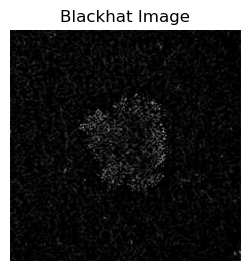

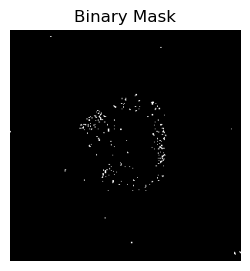

No significant hair detected, saving original image.


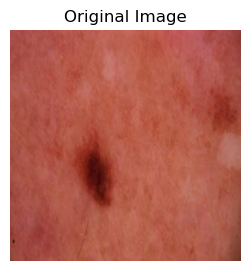

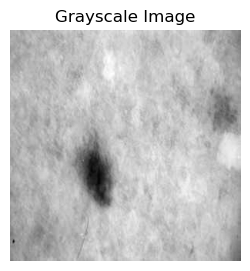

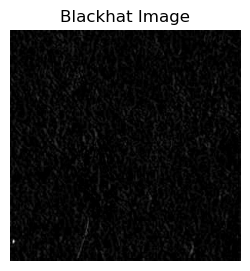

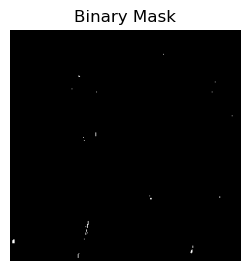

No significant hair detected, saving original image.


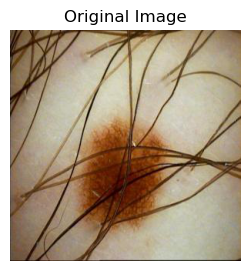

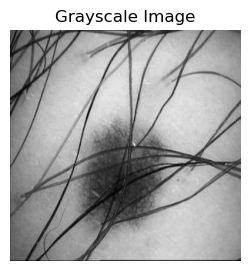

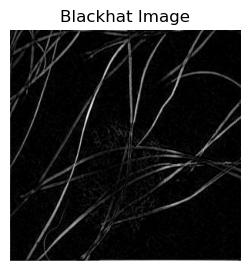

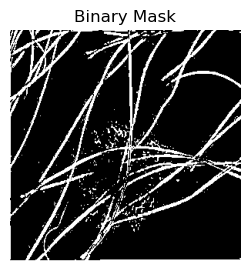

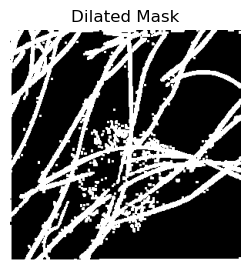

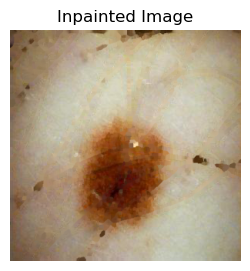

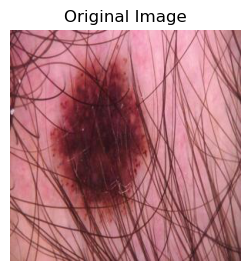

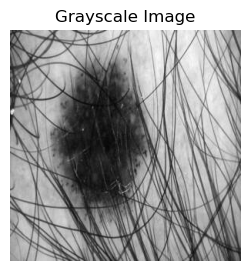

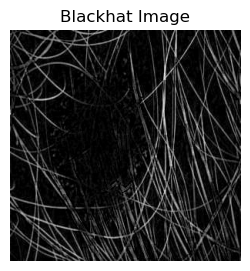

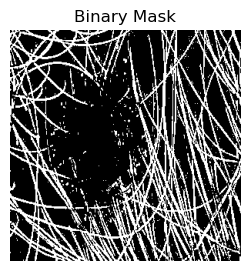

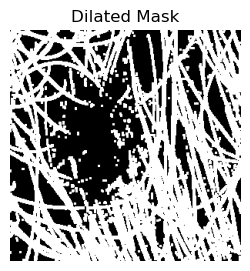

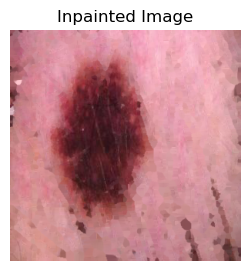

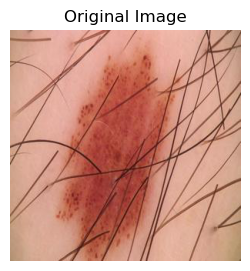

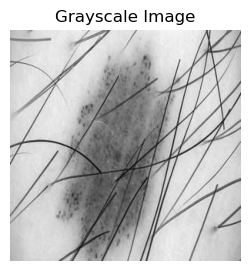

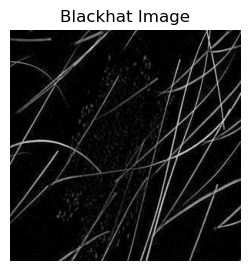

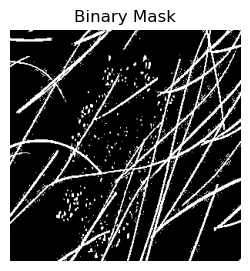

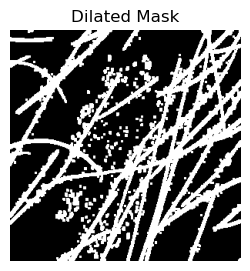

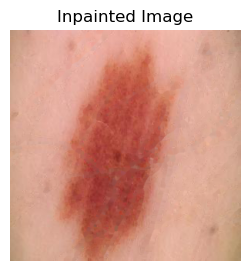

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def display_image(title, image, is_gray=False):
    plt.figure(figsize=(3, 3))
    if is_gray:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def save_image(image, path):
    cv2.imwrite(path, image)

def check_hair_presence(mask, threshold=1000):
    white_pixel_count = np.sum(mask == 255)
    return white_pixel_count > threshold

def process_image(image_path, output_path, threshold=1000):
    # Load the original image
    image = cv2.imread(image_path)
    display_image("Original Image", image)
    
    # Convert to grayscale
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    display_image("Grayscale Image", grayscale, is_gray=True)
    
    # Apply blackhat morphological operation
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    blackhat = cv2.morphologyEx(grayscale, cv2.MORPH_BLACKHAT, kernel)
    display_image("Blackhat Image", blackhat, is_gray=True)
    
    # Create a binary mask from the blackhat image
    _, mask = cv2.threshold(blackhat, 15, 255, cv2.THRESH_BINARY)
    display_image("Binary Mask", mask, is_gray=True)

    # Check for hair presence
    if check_hair_presence(mask, threshold):
        # Dilate the binary mask
        binary_mask_dilated = cv2.dilate(mask, np.ones((3, 3), np.uint8), iterations=1)
        display_image("Dilated Mask", binary_mask_dilated, is_gray=True)
        
        # Inpaint the original image using the mask to remove hair
        inpainted_image = cv2.inpaint(image, binary_mask_dilated, inpaintRadius=1, flags=cv2.INPAINT_TELEA)
        display_image("Inpainted Image", inpainted_image)
        
        # Save the inpainted image
        save_image(inpainted_image, output_path)
    else:
        # If no hair is detected, print message and save the original image
        print("No significant hair detected, saving original image.")
        save_image(image, output_path)

def process_images(input_dir, output_dir, threshold=500):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in os.listdir(input_dir):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, filename)
            process_image(image_path, output_path, threshold)

# Define input and output directories
input_directory = '/Users/hirunifernando/Desktop/Evaluation/original'
output_directory = '/Users/hirunifernando/Desktop/Evaluation/ModelResult'

# Process all images in the input directory and save the results to the output directory
process_images(input_directory, output_directory)
